In [2]:
import pandas as pd
data=pd.read_csv('lsd_math_score_data.csv')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score
0                      5     1.17                78.93
1                     15     2.97                58.20
2                     30     3.26                67.47
3                     60     4.69                37.47
4                    120     5.83                45.65
5                    240     6.00                32.92
6                    480     6.41                29.97


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
onlyMathScore=data['Avg_Math_Test_Score']
print(onlyMathScore)
type(onlyMathScore)

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: Avg_Math_Test_Score, dtype: float64


pandas.core.series.Series

In [6]:
data['HighScore']=100
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score  HighScore
0                      5     1.17                78.93        100
1                     15     2.97                58.20        100
2                     30     3.26                67.47        100
3                     60     4.69                37.47        100
4                    120     5.83                45.65        100
5                    240     6.00                32.92        100
6                    480     6.41                29.97        100


In [7]:
data['HighScore']+=data['Avg_Math_Test_Score']
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score  HighScore
0                      5     1.17                78.93     178.93
1                     15     2.97                58.20     158.20
2                     30     3.26                67.47     167.47
3                     60     4.69                37.47     137.47
4                    120     5.83                45.65     145.65
5                    240     6.00                32.92     132.92
6                    480     6.41                29.97     129.97


In [8]:
newDF=data[['LSD_ppm','Avg_Math_Test_Score']]
print(newDF)
type(newDF)

   LSD_ppm  Avg_Math_Test_Score
0     1.17                78.93
1     2.97                58.20
2     3.26                67.47
3     4.69                37.47
4     5.83                45.65
5     6.00                32.92
6     6.41                29.97


pandas.core.frame.DataFrame

In [9]:
del data['HighScore']
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score
0                      5     1.17                78.93
1                     15     2.97                58.20
2                     30     3.26                67.47
3                     60     4.69                37.47
4                    120     5.83                45.65
5                    240     6.00                32.92
6                    480     6.41                29.97


In [10]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [11]:
time=data[['Time_Delay_in_Minutes']]
lsd=data[['LSD_ppm']]
score=data[['Avg_Math_Test_Score']]

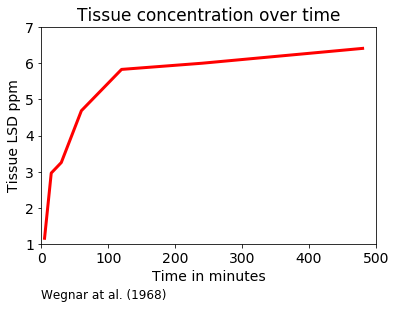

In [12]:
plt.plot(time,lsd,color='r',linewidth=3)

plt.title('Tissue concentration over time',fontsize=17)
plt.xlabel('Time in minutes',fontsize=14)
plt.ylabel('Tissue LSD ppm',fontsize=14)
plt.text(x=0,y=-0.5,s='Wegnar at al. (1968)',fontsize=12)
plt.xlim(0,500)
plt.ylim(1,7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.style.use('ggplot')
plt.show()

In [22]:
regr=LinearRegression()
regr.fit(lsd,score)
print('Theta-1:',regr.coef_[0][0]) #theta_1 or slope of linear line
print('Intercept:',regr.intercept_[0]) ##theta_0 or constant of linear line
print('R-square:',regr.score(lsd,score))
predicted_score=regr.predict(lsd)

Theta-1: -9.009466415296783
Intercept: 89.12387376799306
R-square: 0.8778349707775888


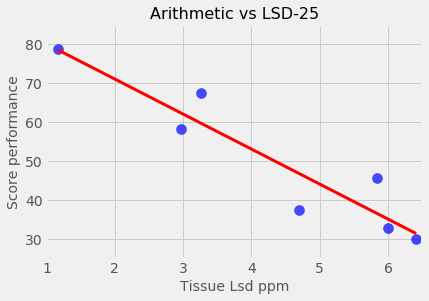

In [24]:
plt.scatter(lsd,score,color='b',s=100,alpha=0.7)
plt.title('Arithmetic vs LSD-25',fontsize=16)
plt.xlabel('Tissue Lsd ppm',fontsize=14)
plt.ylabel('Score performance',fontsize=14)
plt.ylim(25,85)
plt.xlim(1,6.5)
plt.style.use('fivethirtyeight')
plt.plot(lsd,predicted_score,color='r',linewidth=3)
plt.show()